## Import libraries

In [ ]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

## Load and examine the dataset

In [ ]:
data = load_wine(as_frame=True)

In [ ]:
data.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

## Spliting and preprocessing the data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=42)

In [ ]:
# Scale data using StandardScaler
# fit_transform on training data to learn scaling parameters (mean and std)
# transform on testing data using training set's parameters to prevent data leakage

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

## Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=100, random_state=42)
model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(x_test)
log_accuracy = accuracy_score(y_test,y_pred)

In [ ]:
print("Results for logistic Regression:")
print(classification_report(y_test,y_pred))
print(f"Accuracy score: {log_accuracy}")

Results for logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy score: 1.0


In real-world applications, achieving perfect accuracy is rare but in this dataset a prefect acuuracy is achievable.

## XGBoost

In [ ]:
dtrain = xgb.DMatrix(x_train,label=y_train)
dtest = xgb.DMatrix(x_test,label=y_test)

In [ ]:
params = {
    'objective': 'multi:softmax',
    'num_class': len(data.target_names),
    'eval_metric': 'mlogloss',
    'eta': 0.1,
    'max_depth': 3,
    'seed': 42
}

In [ ]:
NUM_ROUNDS = 100
xgboost_model = xgb.train(params, dtrain, NUM_ROUNDS)
xgb_y_pred = xgboost_model.predict(dtest)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

In [ ]:
print("Results for XGBoost:")
print(classification_report(y_test, xgb_y_pred))
print(f"Accuracy: {xgb_accuracy}")


Results for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

Accuracy: 0.9722222222222222


In [ ]:
importance = xgboost_model.get_score(importance_type='weight')
print("XGBoost Feature Importance (weight):", importance)

XGBoost Feature Importance (weight): {'f0': 82.0, 'f1': 20.0, 'f2': 13.0, 'f3': 11.0, 'f4': 44.0, 'f5': 17.0, 'f6': 136.0, 'f7': 1.0, 'f8': 1.0, 'f9': 134.0, 'f10': 26.0, 'f11': 14.0, 'f12': 160.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

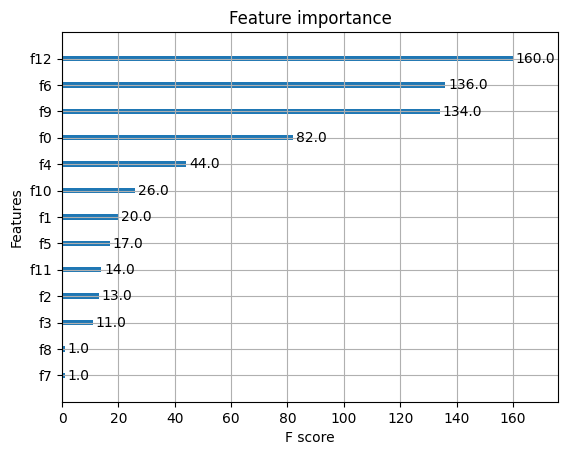

In [ ]:
xgb.plot_importance(xgboost_model)